# **Multi-class Classification on IRIS dataset-**

# **Importing the packages-**

In [1]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes
import seaborn as sns
import plotly.express as px

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#Get the data from the web 
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**check for null/missing values**

In [4]:
#check for null/missing values
df.info()
import missingno as msno
# msno.bar(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**saving the values as X and y**

In [5]:
data = iris
feats, labels = data['data'], data['target']
print(feats.shape)

(150, 4)


**Removing the class 2 for binary classification, better visualisation and understanding**

In [6]:
df_feats = pd.DataFrame(feats)  
df_labels = pd.DataFrame(labels)
print(df_feats.shape)

(150, 4)


In [7]:
#Converting to a dataframe for better preprocessing
df = pd.concat([df_feats, df_labels], axis=1)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [8]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.describe().loc[['min', 'max']].T

,min,max
sepal_length,4.3,7.9
sepal_width,2.0,4.4
petal_length,1.0,6.9
petal_width,0.1,2.5
target,0.0,2.0


In [13]:
#drop petal length, petal width columns
df = df.drop(['petal_width','petal_length'], axis=1)
X = df[['sepal_width', 'sepal_length']]
y = df[['target']]
print(X.shape, y.shape)

(150, 2) (150, 1)


**Making the train-test split-**

In [14]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, shuffle=True, random_state=0)

**Feature scaling-**

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

**Grid search CV for hyper-parameter selection-**

In [18]:
from sklearn.svm import SVC #model I will train
from sklearn.model_selection import StratifiedKFold # for splitting the training-validation data
from sklearn.model_selection import GridSearchCV #for validating hyperparameters

In [19]:
crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) #choose how many subsets to create
parameters = [
               {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},
              #  {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100], "gamma": [0.01, 0.1, 1, 10, 100]},
              #  {"kernel": ["poly"], "C": [0.01, 0.1, 1, 10, 100], "degree": np.arange(1,5,1)}
              ]

model = SVC()
clf = GridSearchCV(estimator= model, param_grid=parameters, cv=crossval, verbose=1 , n_jobs=-1)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}],
             verbose=1)

In [20]:
scores = pd.DataFrame(clf.cv_results_)
scores = scores.sort_values(by="rank_test_score").set_index("rank_test_score")
# int_cols = ["param_C", "param_kernel", "param_degree", "param_gamma", "mean_test_score"]
int_cols = ["param_C", "param_kernel", "mean_test_score"]
scores[int_cols].head() # only look at the first 5

,param_C,param_kernel,mean_test_score
rank_test_score,,,
1,1,linear,0.841667
2,100,linear,0.825000
3,10,linear,0.816667
4,0.1,linear,0.466667
5,0.01,linear,0.366667


In [21]:
#finally I use the best values of the newly found hyperparameters to train the entire original training set, 
#evaluating its accuracy on the test set, whose data results as 'unseen'

from sklearn.metrics import accuracy_score as accuracy #accuracy metric
fitted_model = clf.best_estimator_

predictions = fitted_model.predict(X_test)
round(accuracy(y_test, predictions), 3) #evaluation

0.733

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      0.62      0.67        13
           2       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.76      0.73      0.74        30



In [23]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


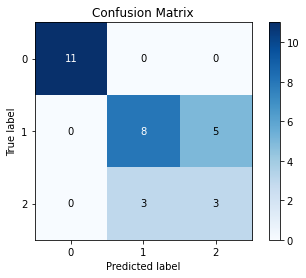

In [24]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False)
plt.show()

# **Visualising the Decision Boundary-**

Text(0.5, 1.0, 'decision boundary with test points')

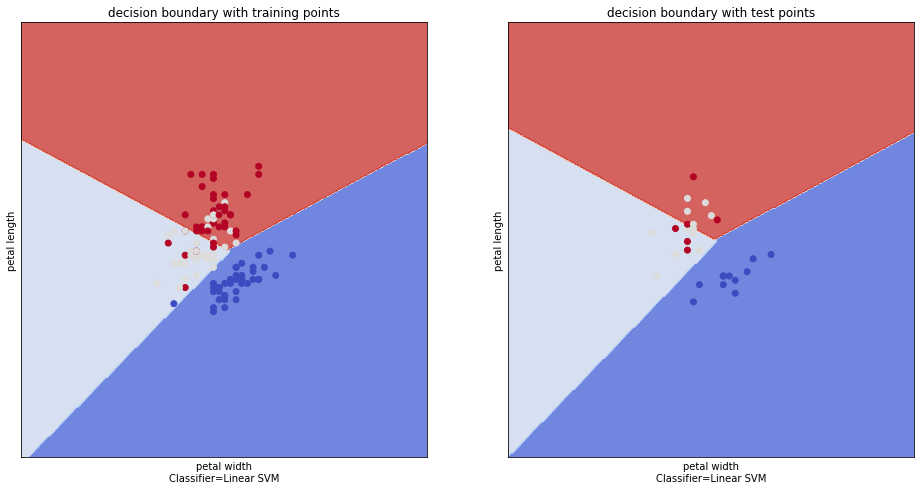

In [37]:
#set up range for the 2 coordinates
h=0.01 #mesh step size
x1_min, x1_max = X_train[:, 0].min()-1 , X_train[:, 0].max()+1 
x2_min, x2_max = X_train[:, 1].min()-1 , X_train[:, 1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                    np.arange(x2_min, x2_max, h))


pred = fitted_model.predict(np.c_[xx1.ravel(), xx2.ravel()]) #np.c_ concatenates along columns
# Put the result into a color plot
pred = pred.reshape(xx1.shape)
colors = ['red','green','blue','purple']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
#print(xx1.shape,xx2.shape,pred.shape)
ax1.contourf(xx1, xx2, pred, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train.to_numpy(), cmap=plt.cm.coolwarm)
xlabel = 'petal width' + str('\n')+'Classifier=Linear SVM'
ax1.set_xlabel(xlabel)
ax1.set_ylabel('petal length')
ax1.set_xlim(xx1.min(), xx1.max())
ax1.set_ylim(xx2.min(), xx2.max())
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('decision boundary with training points')


#Plot test data decision surface
x1_test_min, x1_test_max = X_test[:, 0].min()-1 , X_test[:, 0].max()+1 
x2_test_min, x2_test_max = X_test[:, 1].min()-1 , X_test[:, 1].max()+1
xx1_test, xx2_test = np.meshgrid(np.arange(x1_test_min, x1_test_max, h),
                    np.arange(x2_test_min, x2_test_max, h))


pred_test = fitted_model.predict(np.c_[xx1_test.ravel(), xx2_test.ravel()]) #np.c_ concatenates along columns
# Put the result into a color plot
pred_test = pred_test.reshape(xx1_test.shape)


ax2.contourf(xx1_test, xx2_test, pred_test, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test.to_numpy(), cmap=plt.cm.coolwarm)
xlabel = 'petal width' + str('\n')+'Classifier=Linear SVM'
ax2.set_xlabel(xlabel)
ax2.set_ylabel('petal length')
ax2.set_xlim(xx1_test.min(), xx1_test.max())
ax2.set_ylim(xx2_test.min(), xx2_test.max())
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('decision boundary with test points')



In [39]:
#Printing some important information
print('w = ',fitted_model.coef_)
print('b = ',fitted_model.intercept_)
#print('Support vectors = ', fitted_model.support_vectors_)
print('Number of support vectors for each class = ', fitted_model.n_support_)

w =  [[ 3.50375475 -3.67678159]
 [ 2.11245071 -4.23529391]
 [-1.70277809 -3.4055554 ]]
b =  [-0.35816519  0.70833613  2.34803242]
Number of support vectors for each class =  [23 36 33]
